### Anirudh Agrawal 
### 220968380
### DSE IV B

# **Week 7**
## Naive Bayes Classifier

## NB1 Dataset

1. Import libraries
2. Import dataset
3. Exploratory data analysis 
4. Print the percentage of missing values in the categorical variables in the training set
5. Print categorical variables with missing data
6. Impute missing categorical variables with the most frequent value
7. Encode categorical variables
8. Declare feature vector and target variable
9. Split data into separate training and test set
10. Feature Scaling
11. Model training
12. Predict the results
13. Check the accuracy score
14. Compare the train-set and test-set accuracy
15. Visualize confusion matrix with seaborn heatmap
16. Generate Classification Report
17. Evaluate Classification accuracy
18. Evaluate Classification error
19. Calculate class probabilities and store the probabilities in data frame with appropriate heading
20. Plot histogram of predicted probabilities
21. Plot ROC Curve
22. Compute ROC AUC
23. Calculate cross-validated ROC AUC
24. Applying 10-Fold Cross Validation
25. Compute the Average cross-validation score

### 1. Import libraries

In [236]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics

### 2. Import dataset

In [237]:
df = pd.read_csv('NB1.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 3. Exploratory data analysis

In [238]:
df.shape

(32561, 15)

In [239]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [240]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [241]:
df[' marital-status'].value_counts()

 marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [242]:
df[' race'].value_counts()

 race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [243]:
df[' sex'].value_counts()

 sex
 Male      21790
 Female    10771
Name: count, dtype: int64

In [244]:
df[' workclass'] = df[' workclass'].replace(to_replace=" ?",value=" NaN")
df[' workclass'].value_counts()

 workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 NaN                  1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [245]:
df[' occupation'] = df[' occupation'].replace(to_replace=" ?",value=" NaN")
df[' occupation'].value_counts()

 occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 NaN                  1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [246]:
df[' native-country'] = df[' native-country'].replace(to_replace=" ?",value=" NaN")
df[' native-country'].value_counts()

 native-country
 United-States                 29170
 Mexico                          643
 NaN                             583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                 

In [247]:
corr = df.corr(numeric_only=True)
corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


### 4. Print the percentage of missing values in the categorical variables in the training set

In [248]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

### 5. Print categorical variables with missing data

In [249]:
print(df[' workclass'].isna().sum())
print(df[' marital-status'].isna().sum())
print(df[' relationship'].isna().sum())
print(df[' sex'].isna().sum())
print(df[' native-country'].isna().sum())
print(df[' education'].isna().sum())

0
0
0
0
0
0


### 6. Impute missing categorical variables with the most frequent value

In [250]:
df[' workclass'].isnull().replace(df[' workclass'].mode())
df[' sex'].isnull().replace(df[' sex'].mode())
df[' education'].isnull().replace(df[' education'].mode())

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name:  education, Length: 32561, dtype: bool

### 7. Encode categorical variables

In [251]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 
  
# Encode labels in columns
df[' workclass']= label_encoder.fit_transform(df[' workclass']) 
df[' education']= label_encoder.fit_transform(df[' education']) 
df[' marital-status']= label_encoder.fit_transform(df[' marital-status']) 
df[' occupation']= label_encoder.fit_transform(df[' occupation']) 
df[' relationship']= label_encoder.fit_transform(df[' relationship']) 
df[' race']= label_encoder.fit_transform(df[' race']) 
df[' sex']= label_encoder.fit_transform(df[' sex']) 
df[' native-country']= label_encoder.fit_transform(df[' native-country'])
df[' income']= label_encoder.fit_transform(df[' income']) 

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,0,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,3,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,5,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,5,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,6,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,0,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,0,3,4,1,0,0,20,39,0


### 8. Declare feature vector and target variable

In [252]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#### Independent Columns = All columns except Income
#### Dependent Columns = Income

### 9. Split data into separate training and test set

In [253]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=4)

### 10. Feature Scaling

In [254]:
from sklearn import preprocessing

X_train= preprocessing.normalize(X_train)
X_test= preprocessing.normalize(X_test)

# y_train= preprocessing.normalize(y_train)
# y_test= preprocessing.normalize(y_test)

### 11. Model training

In [255]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

bern_nb = BernoulliNB()
bern_nb.fit(X_train, y_train)

BernoulliNB()

In [256]:
mul_nb = MultinomialNB()
mul_nb.fit(X_train, y_train)

MultinomialNB()

In [257]:
gaus_nb = GaussianNB()
gaus_nb.fit(X_train, y_train)

GaussianNB()

### 12. Predict the results

In [258]:
y_pred_bern = bern_nb.predict(X_test)
y_pred_mul = mul_nb.predict(X_test)
y_pred_gaus = gaus_nb.predict(X_test)

### 13. Check the accuracy score

In [259]:
print ('Accuracy Score of Bernoulli Naive Bayes: ', metrics.accuracy_score(y_test, y_pred_bern))
print ('Accuracy Score of Multinomial Naive Bayes: ', metrics.accuracy_score(y_test, y_pred_mul))
print ('Accuracy Score of Gaussian Naive Bayes: ', metrics.accuracy_score(y_test, y_pred_gaus))

Accuracy Score of Bernoulli Naive Bayes:  0.7289030831593171
Accuracy Score of Multinomial Naive Bayes:  0.7620685419481636
Accuracy Score of Gaussian Naive Bayes:  0.7947426606068051


### 14. Compare the train-set and test-set accuracy

In [260]:
#Train Set Accuracy for all 3 models
train_accuracy = []
train_accuracy.append(bern_nb.score(X_train, y_train))
train_accuracy.append(mul_nb.score(X_train, y_train))
train_accuracy.append(gaus_nb.score(X_train, y_train))


#Test Set Accuracy for all 3 models
test_accuracy = []
test_accuracy.append(metrics.accuracy_score(y_test, y_pred_bern))
test_accuracy.append(metrics.accuracy_score(y_test, y_pred_mul))
test_accuracy.append(metrics.accuracy_score(y_test, y_pred_gaus))

print ('Training Set Accuracies: ', train_accuracy)
print ('Testing Set Accuracies: ', test_accuracy)

Training Set Accuracies:  [0.728951678951679, 0.764004914004914, 0.7931203931203932]
Testing Set Accuracies:  [0.7289030831593171, 0.7620685419481636, 0.7947426606068051]


#### Hence we observe that all models are well fit, as corresponding Train-Test accuracy pair for each model is *very close*.
#### Also, the variation in accuracies across models is marginal. However, the Gaussian NB model is best fit, followed by Multinomial NB model, and then the Bernoulli NB model. 

### 15. Visualize confusion matrix with seaborn heatmap

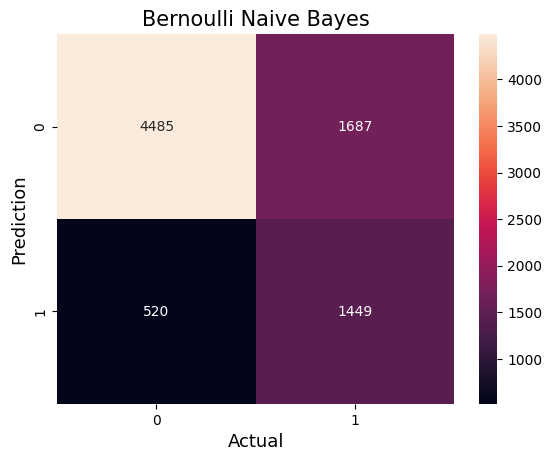

In [261]:
conf_mat = metrics.confusion_matrix(y_test,y_pred_bern)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Bernoulli Naive Bayes',fontsize=15)
plt.show()

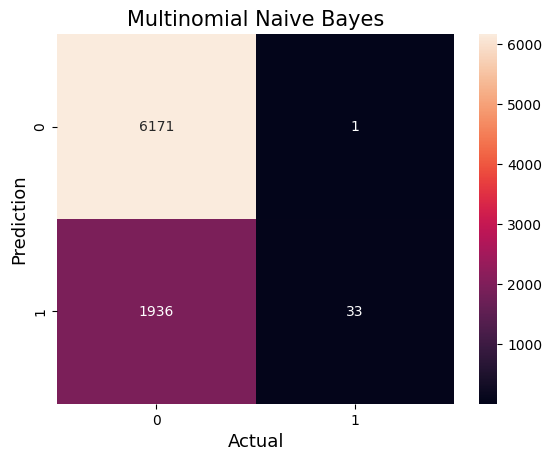

In [262]:
conf_mat = metrics.confusion_matrix(y_test,y_pred_mul)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Multinomial Naive Bayes',fontsize=15)
plt.show()

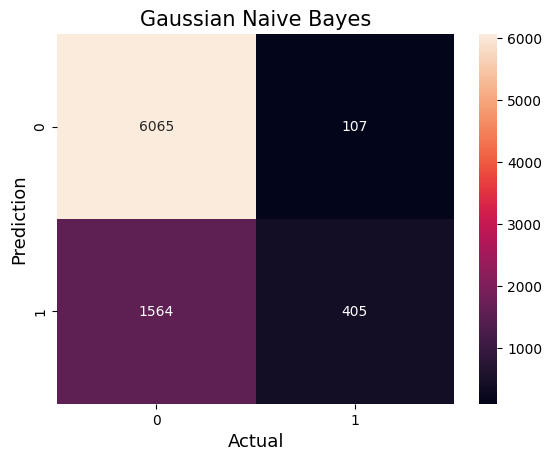

In [263]:
conf_mat = metrics.confusion_matrix(y_test,y_pred_gaus)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Gaussian Naive Bayes',fontsize=15)
plt.show()

### 16. Generate Classification Report

In [264]:
print('*******Bernoulli Naive Bayes: \n', metrics.classification_report(y_test, y_pred_bern))
print('*******Multinomial Naive Bayes: \n', metrics.classification_report(y_test, y_pred_mul))
print('*******Gaussian Naive Bayes: \n', metrics.classification_report(y_test, y_pred_gaus))

*******Bernoulli Naive Bayes: 
               precision    recall  f1-score   support

           0       0.90      0.73      0.80      6172
           1       0.46      0.74      0.57      1969

    accuracy                           0.73      8141
   macro avg       0.68      0.73      0.69      8141
weighted avg       0.79      0.73      0.75      8141

*******Multinomial Naive Bayes: 
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      6172
           1       0.97      0.02      0.03      1969

    accuracy                           0.76      8141
   macro avg       0.87      0.51      0.45      8141
weighted avg       0.81      0.76      0.66      8141

*******Gaussian Naive Bayes: 
               precision    recall  f1-score   support

           0       0.79      0.98      0.88      6172
           1       0.79      0.21      0.33      1969

    accuracy                           0.79      8141
   macro avg       0.79      0.

### 17. Evaluate Classification accuracy

In [265]:
print ('Classification Accuracy of Binomial Naive Bayes: ', bern_nb.score(X_test, y_test))
print ('Classification Accuracy of Multinomial Naive Bayes: ', mul_nb.score(X_test, y_test))
print ('Classification Accuracy of Gaussian Naive Bayes: ', gaus_nb.score(X_test, y_test))

Classification Accuracy of Binomial Naive Bayes:  0.7289030831593171
Classification Accuracy of Multinomial Naive Bayes:  0.7620685419481636
Classification Accuracy of Gaussian Naive Bayes:  0.7947426606068051


### 18. Evaluate Classification error

In [266]:
print ('Classification Error of Binomial Naive Bayes: ', 1-bern_nb.score(X_test, y_test))
print ('Classification Error of Multinomial Naive Bayes: ', 1-mul_nb.score(X_test, y_test))
print ('Classification Error of Gaussian Naive Bayes: ', 1-gaus_nb.score(X_test, y_test))

Classification Error of Binomial Naive Bayes:  0.27109691684068293
Classification Error of Multinomial Naive Bayes:  0.23793145805183635
Classification Error of Gaussian Naive Bayes:  0.2052573393931949


### 19. Calculate class probabilities and store the probabilities in data frame with appropriate heading

In [267]:
#predict_proba() is used to predict predicted class probabilities

class_prob1={}
class_prob2={}
class_prob3={}

bern_pred_class_0 = bern_nb.predict_proba(X_test)[:,0]
bern_pred_class_1 = bern_nb.predict_proba(X_test)[:,1]

mul_pred_class_0 = mul_nb.predict_proba(X_test)[:,0]
mul_pred_class_1 = mul_nb.predict_proba(X_test)[:,1]

gaus_pred_class_0 = gaus_nb.predict_proba(X_test)[:,0]
gaus_pred_class_1 = gaus_nb.predict_proba(X_test)[:,1]


class_prob1[0] = np.mean(bern_pred_class_0,axis=0)
class_prob1[1] = np.mean(bern_pred_class_1,axis=0)
class_prob2[0] = np.mean(mul_pred_class_0,axis=0)
class_prob2[1] = np.mean(mul_pred_class_1,axis=0)
class_prob3[0] = np.mean(gaus_pred_class_0,axis=0)
class_prob3[1] = np.mean(gaus_pred_class_1,axis=0)

class_probabilities1 = pd.DataFrame(class_prob1, index=['Bernoulli'])
class_probabilities2 = pd.DataFrame(class_prob2, index=['Multinomial'])
class_probabilities3 = pd.DataFrame(class_prob3, index=['Gaussian'])

print(class_probabilities1)
print(class_probabilities2)
print(class_probabilities3)

                 0        1
Bernoulli  0.72498  0.27502
                    0         1
Multinomial  0.759642  0.240358
                 0         1
Gaussian  0.935429  0.064571


#### *We note that the Gaussian model has a very high probability of classifying the income as class 0, ie., <=50K*

### 20. Plot histogram of predicted probabilities

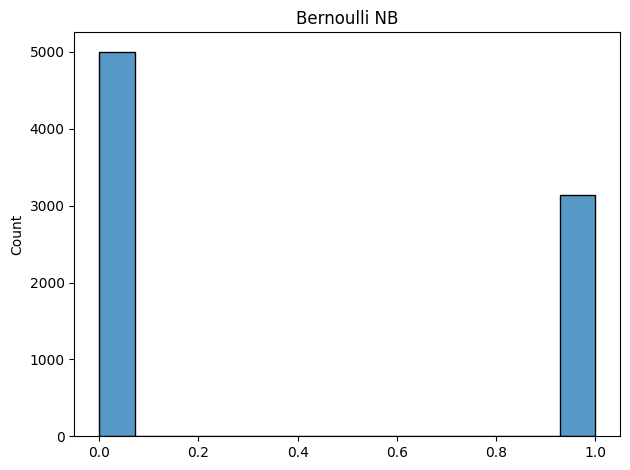

In [268]:
sns.histplot(y_pred_bern)
plt.title('Bernoulli NB')
plt.tight_layout()

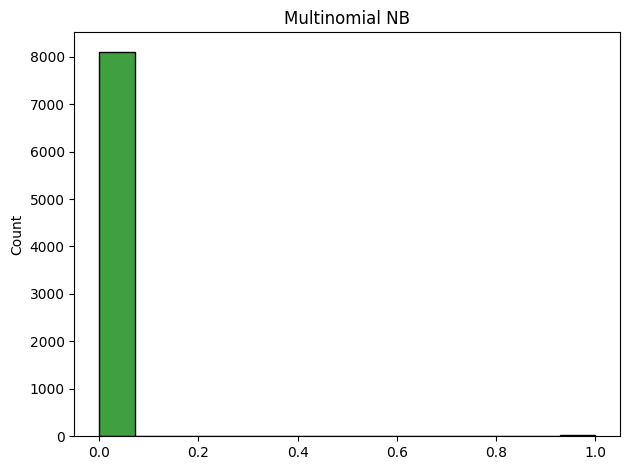

In [269]:
sns.histplot(y_pred_mul, color='g')
plt.title('Multinomial NB')
plt.tight_layout()

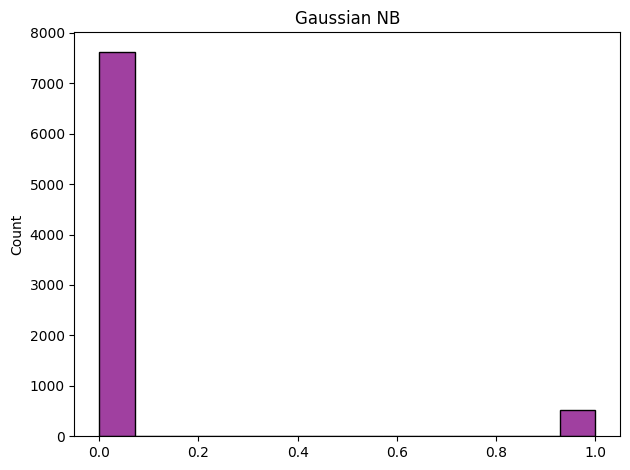

In [270]:
sns.histplot(y_pred_gaus, color='purple')
plt.title('Gaussian NB')
plt.tight_layout()

### 21. Plot ROC Curve

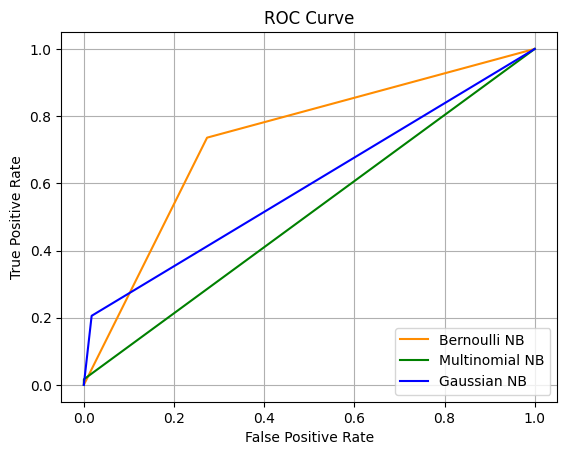

In [271]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr1, tpr1, thresholds1 = roc_curve(y_test,y_pred_bern)
fpr2, tpr2, thresholds2 = roc_curve(y_test,y_pred_mul)
fpr3, tpr3, thresholds3 = roc_curve(y_test,y_pred_gaus)

plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', label='Bernoulli NB')
plt.plot(fpr2, tpr2, color='g', label='Multinomial NB')
plt.plot(fpr3, tpr3, color='b', label='Gaussian NB')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()

### 22. Compute ROC AUC

In [272]:
print("ROC-AUC Score for Bernoulli NB = ", roc_auc_score(y_test, y_pred_bern))
print("ROC-AUC Score for Multinomial NB = ", roc_auc_score(y_test, y_pred_mul))
print("ROC-AUC Score for Gaussian NB = ", roc_auc_score(y_test, y_pred_gaus))

ROC-AUC Score for Bernoulli NB =  0.7312876892547381
ROC-AUC Score for Multinomial NB =  0.508298877250658
ROC-AUC Score for Gaussian NB =  0.5941759044186841


#### Hence we observe that ROC graph for Bernoulli NB has greatest Area under Curve, followed by Gaussian NB and then Multinomial NB.

### 23. Calculate cross-validated ROC AUC

In [273]:
#Note: Here we find ROC AUC for training dataset (X_train and y_train)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold=KFold(n_splits=3,random_state=5,shuffle=True)
roc_score1 = cross_val_score(bern_nb, X_train, y_train, cv=kfold, scoring='roc_auc')
roc_score2 = cross_val_score(mul_nb, X_train, y_train, cv=kfold, scoring='roc_auc')
roc_score3 = cross_val_score(gaus_nb, X_train, y_train, cv=kfold, scoring='roc_auc')
print('Cross-validated ROC AUC score of Bernoulli NB: ', np.mean(roc_score1))
print('Cross-validated ROC AUC score of Multinomial NB: ', np.mean(roc_score2))
print('Cross-validated ROC AUC score of Gaussian NB: ', np.mean(roc_score3))

Cross-validated ROC AUC score of Bernoulli NB:  0.7769626902189622
Cross-validated ROC AUC score of Multinomial NB:  0.659753284154955
Cross-validated ROC AUC score of Gaussian NB:  0.7728667162544656


### 24. Applying 10-Fold Cross Validation

In [274]:
#Note: Here we find ROC AUC for complete dataset (X and y)

cv = KFold(n_splits=10, random_state=None, shuffle=False)

scores_bern = cross_val_score(bern_nb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_mul = cross_val_score(mul_nb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_gaus = cross_val_score(gaus_nb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

### 25. Compute the Average cross-validation score

In [275]:
print("Mean Accuracy for 10 splits for Bernoulli NB:", (np.mean(scores_bern)))
print("Mean Accuracy for 10 splits for Multinomial NB:", (np.mean(scores_mul)))
print("Mean Accuracy for 10 splits for Gaussian NB:", (np.mean(scores_gaus)))

Mean Accuracy for 10 splits for Bernoulli NB: 0.7284171533020167
Mean Accuracy for 10 splits for Multinomial NB: 0.7825928693368055
Mean Accuracy for 10 splits for Gaussian NB: 0.7954610802361801
